In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [45]:
df=pd.read_csv("housing.csv")
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
import seaborn as sns

C:\Users\daima\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


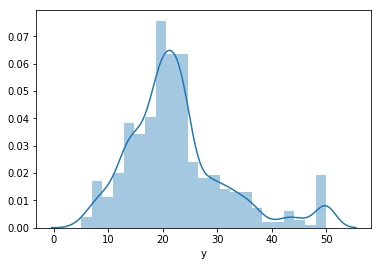

In [10]:
sns.distplot(df["y"])

In [11]:
#外れ値除去（3σ法）：まずは1変数（x6）に関して行ってみる

In [12]:
col='x6'

In [16]:
mean=df.mean()

In [15]:
mean[col]

6.284634387351788

In [17]:
sigma=df.std()

In [18]:
sigma[col]

0.7026171434153234

In [20]:
low=mean[col]-3*sigma[col]
low

4.176782957105817

In [22]:
high=mean[col]+3*sigma[col]
high

8.392485817597759

In [24]:
df_x6=df[(df[col]>low)&(df[col]<high)]

In [26]:
#外れ値除去（3σ法）：全変数に関して行う

In [27]:
cols=df.columns

In [30]:
_df=df
for col in cols:
    low=mean[col]-3*sigma[col]
    high=mean[col]+3*sigma[col]
    _df=_df[(_df[col]>low)&(_df[col]<high)]

In [31]:
len(df)

506

In [32]:
len(_df)

415

サンプルが減る場合の対処法
・外れ値は取り除く
・外れ値を平均もしくは中央値で補完する。
・主成分分析を使って、潜在変数に変換した後に外れ値を取り除く

In [33]:
X=_df.iloc[:,:-1]
y=_df.iloc[:,-1]

In [34]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)

重回帰分析

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model=LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
#検証

In [43]:
model.score(X_train,y_train)

0.7972109224535133

In [44]:
model.score(X_test,y_test)

0.6253776004329583

trainでの決定係数は高いがtestではかなり下がっている←過学習（Overfitting）という

スケーリング

In [46]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()#LinearRgressionと同じイメージ

In [50]:
scaler.fit(X_train)#平均と標準偏差の取得：scalerの学習という

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
X_train2=scaler.transform(X_train)
X_test2=scaler.transform(X_test)

In [52]:
model=LinearRegression()

In [53]:
model.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
#検証

In [55]:
model.score(X_train2,y_train)

0.7972109224535133

In [59]:
model.score(X_test2,y_test)

0.6253776004329596

In [60]:
#モデルの確認

In [62]:
np.set_printoptions(precision=3,suppress=True)
model.coef_

array([-0.195,  0.212,  0.508,  0.   , -1.213,  3.92 , -0.37 , -1.857,
        1.166, -1.529, -1.873,  0.244, -2.761])